In [68]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import random
from time import time

In [34]:
def create_instance(d, n, sigma):
    """return dataset and fresh sample"""
    X = np.random.choice((-1,1), size=(n,d))
    B = (1/np.sqrt(d)) * np.random.choice((-1,1), size=d)
    Z = np.random.normal(0, sigma, size=n)
    Y = X@B + Z
    x = np.random.choice((-1,1), size=d)
    y = x@B + np.random.normal(0, sigma, size=1)
    return X, Y, B, x, y


In [71]:
# as-written 
np.random.seed(330)
d = 3000
n = 100
sigma = 0.1
runs = 1000
hi_in = 0
lo_out = float('Inf')

for run in range(runs):
    X, Y, true_B, x, y = create_instance(d, n, sigma)

    B_hat = np.linalg.lstsq(X, Y, rcond=None)[0]

    ins = np.max(np.abs(Y[i] - X[i,:]@B_hat))
    out = np.abs((y - x@B_hat)[0])
    if ins > hi_in:
        hi_in = ins
    if out < lo_out:
        lo_out = out
    
    if run % 1000 == 0:
        print('run:', run)
print(hi_in)
print(lo_out)

run: 0
9.492406860545088e-15
0.00046463106005051324


run: 0
run: 100
run: 200
run: 300
run: 400
run: 500
run: 600
run: 700
run: 800
run: 900
time: 6.083802938461304
0.05 quantile: 0.0061237387289873775
tpr: 0.049668666666666667



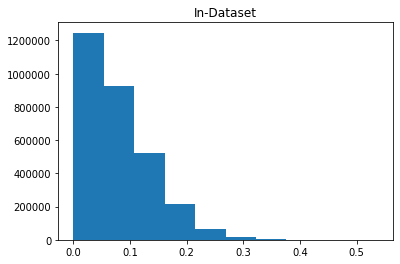

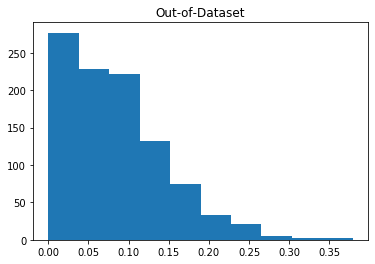

In [74]:
# more likely assignment, given what I read
# but if I swap n and d, then the generalization gap is too small
np.random.seed(330)
d = 100
n = 3000
sigma = 0.1
runs = 1000

ins = np.zeros((runs, n))
outs = np.zeros(runs)

start = time()
for run in range(runs):
    X, Y, true_B, x, y = create_instance(d, n, sigma)

    B_hat = np.linalg.lstsq(X, Y, rcond=None)[0]

    ins[run, :] = np.abs(Y - X@B_hat)
    outs[run] = np.abs((y - x@B_hat)[0])
    
    if run % 100 == 0:
        print('run:', run)
end = time()
print('time:', end-start)

q = np.quantile(outs, 0.05)
print('0.05 quantile:', q)
print('tpr:', np.sum(ins <= q, axis=(0,1)) / (runs*n))
print()

plt.hist(ins.flatten())
plt.title('In-Dataset')
plt.show()
plt.hist(outs)
plt.title('Out-of-Dataset')
plt.show()